<a href="https://colab.research.google.com/github/adruiid/Projects/blob/main/Depression_Label_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Depression Label Prediction using depression data

*   **Adreed Saadad Hasan - 22301190**
*   **Khandaker Shoumik Mujtaheed - 24141284**

Section - 10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf

from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df=pd.read_csv('/content/Depression Data.csv')

df_info=df.info()
df_head=df.head()
df_target_distribution=df.iloc[:, -1].value_counts()  # Assuming the last column is the target

df_info, df_head.shape, df_target_distribution



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 37 columns):
 #   Column                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                 --------------  ----- 
 0   1. Age                                                                                                                                                                 1977 non-null   object
 1   2. Gender                                                                                                                                                              1971 non-null   object
 2   5. Academic Year                                                                                            

(None,
 (5, 37),
 Depression Label
 Moderately Severe Depression    495
 Severe Depression               488
 Moderate Depression             449
 Mild Depression                 408
 Minimal Depression               93
 No Depression                    44
 Name: count, dtype: int64)

#Data Classification

In [ ]:
#Total Features:
print(f"There are {df.shape[1]} features in this dataset.")

#Total Rows:
print(f"There are {df.shape[0]} rows in this dataset.")

#Data Points:
print(f"There are {df.size} data points in this dataset.")

# Classification or Regression?
print("This is a classification problem.")

There are 37 features in this dataset.
There are 1977 rows in this dataset.
There are 73149 data points in this dataset.
This is a classification problem.


In [ ]:
#Numerical features
numerical_data = df.select_dtypes(include='int64')
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} quantitative features:', '\n')
print(numerical_features)

#Categorical features
categorical_data=df.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()

print(f'\nThere are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 29 quantitative features: 

['1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ', '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ', '3. In a semester, how often have you had trouble relaxing due to academic pressure? ', '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?', '5. In a semester, how often have you worried too much about academic affairs? ', '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?', '7. In a semester, how often have you felt afraid, as if something awful might happen?', 'Anxiety Value', '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ', '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?', '3. In a semester, how often you felt nervous and s

#Correlation between all the features

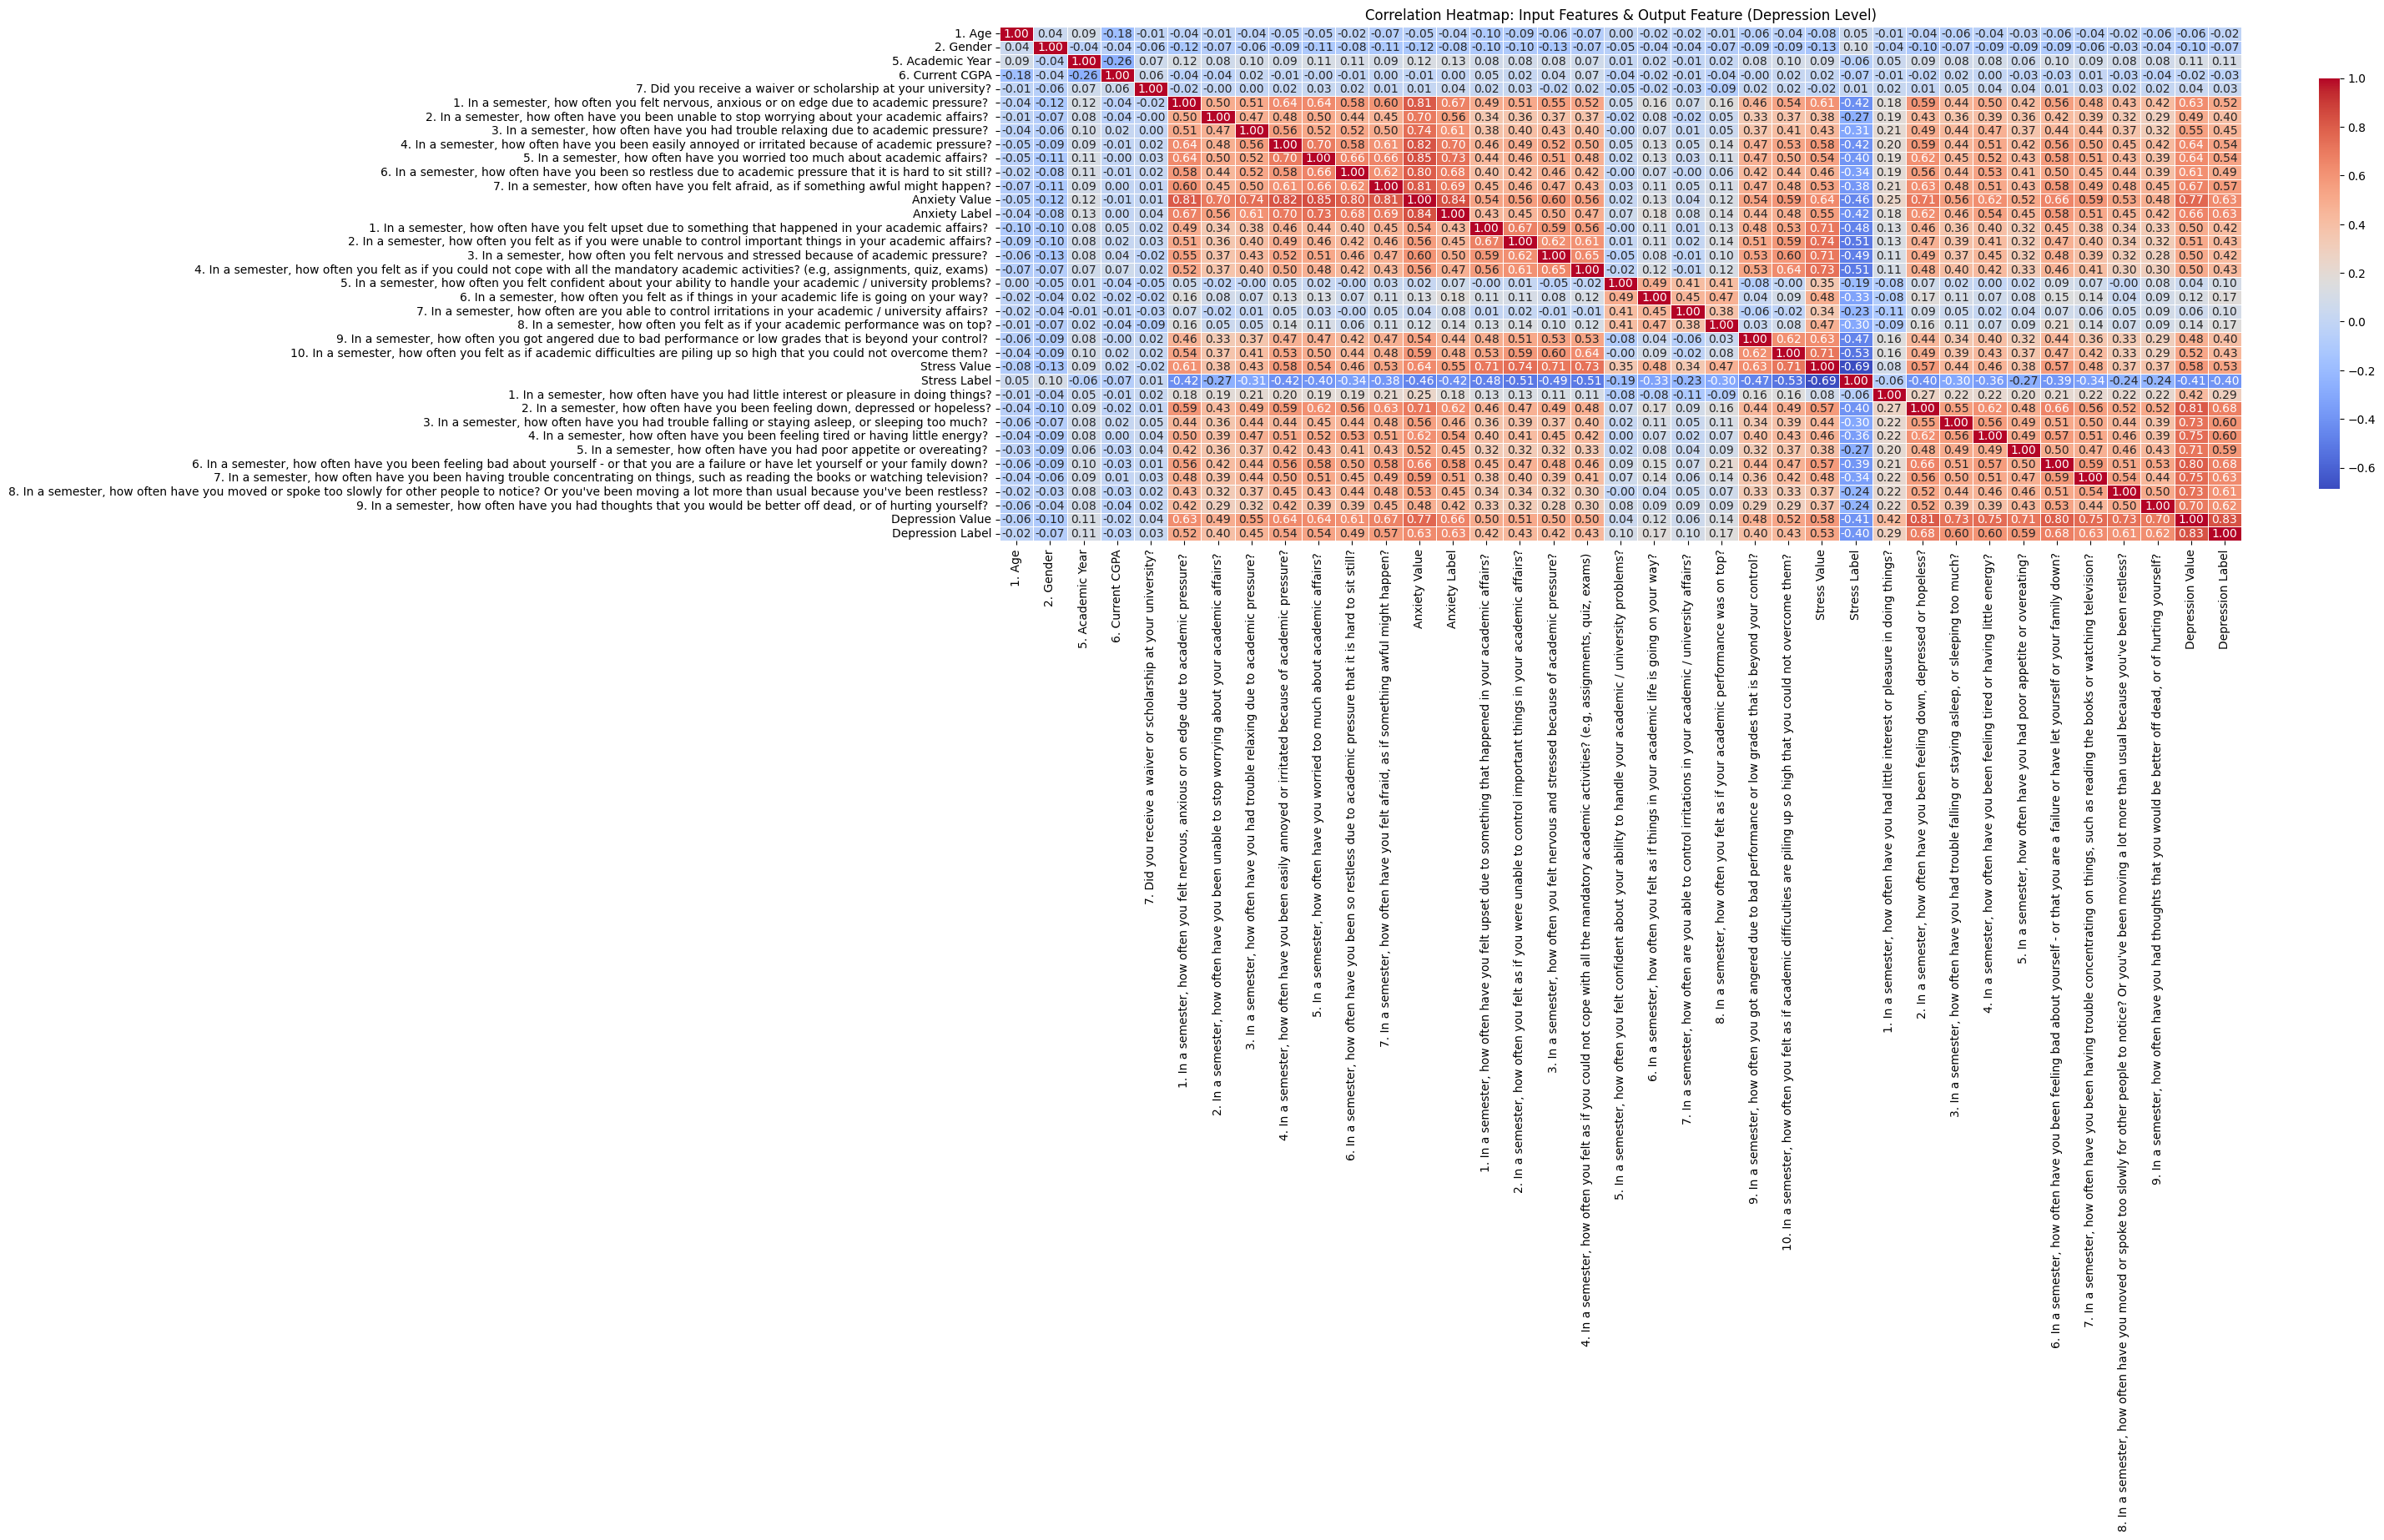

In [ ]:
# Encode categorical columns to numeric values using LabelEncoder
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Check if target column is named 'Depression Label' or something else
target_col = 'Depression Label' if 'Depression Label' in df.columns else df.columns[-1]

# Compute correlation matrix for all features (input + target)
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(24, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap: Input Features & Output Feature (Depression Level)")


# Save the heatmap plot as an image
plt.savefig("correlation_heatmap.png")
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?","4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?","5. In a semester, how often have you worried too much about academic affairs?","6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?","7. In a semester, how often have you felt afraid, as if something awful might happen?",Anxiety Value,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?",...,"1. In a semester, how often have you had little interest or pleasure in doing things?","2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value
"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?",1.000000,0.495772,0.511390,0.635193,0.643153,0.580194,0.598137,0.805124,0.491888,0.511299,...,0.178723,0.592705,0.440335,0.500472,0.415241,0.555560,0.483629,0.428253,0.416095,0.627624
"2. In a semester, how often have you been unable to stop worrying about your academic affairs?",0.495772,1.000000,0.473536,0.481888,0.498965,0.441217,0.447900,0.698547,0.342687,0.356513,...,0.187395,0.426127,0.363543,0.393809,0.361505,0.417127,0.388554,0.324906,0.289480,0.492171
"3. In a semester, how often have you had trouble relaxing due to academic pressure?",0.511390,0.473536,1.000000,0.564550,0.517929,0.519029,0.499364,0.740075,0.377510,0.400276,...,0.205356,0.494548,0.438430,0.474976,0.372413,0.444108,0.436933,0.371762,0.318506,0.554905
"4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?",0.635193,0.481888,0.564550,1.000000,0.695984,0.583702,0.605070,0.824525,0.459347,0.492151,...,0.204851,0.588961,0.443092,0.508928,0.423595,0.563925,0.503970,0.447433,0.422247,0.642284
"5. In a semester, how often have you worried too much about academic affairs?",0.643153,0.498965,0.517929,0.695984,1.000000,0.660851,0.662909,0.846620,0.435808,0.459529,...,0.190281,0.616251,0.452073,0.515111,0.425131,0.576295,0.513104,0.434942,0.389694,0.642935
"6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?",0.580194,0.441217,0.519029,0.583702,0.660851,1.000000,0.620680,0.797915,0.396751,0.422960,...,0.189561,0.559738,0.442977,0.533634,0.412510,0.500339,0.451295,0.438958,0.387305,0.611745
"7. In a semester, how often have you felt afraid, as if something awful might happen?",0.598137,0.447900,0.499364,0.605070,0.662909,0.620680,1.000000,0.807292,0.452806,0.459616,...,0.209400,0.625255,0.482671,0.509573,0.431500,0.583713,0.493026,0.476058,0.446520,0.666259
Anxiety Value,0.805124,0.698547,0.740075,0.824525,0.846620,0.797915,0.807292,1.000000,0.535160,0.561286,...,0.247788,0.707107,0.555328,0.622422,0.515040,0.659581,0

In [ ]:
# Transposed stats for numerical features

numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?",1977.0,1.770359,0.951704,0.0,1.0,2.0,3.0,3.0
"2. In a semester, how often have you been unable to stop worrying about your academic affairs?",1977.0,1.629236,1.028252,0.0,1.0,2.0,3.0,3.0
"3. In a semester, how often have you had trouble relaxing due to academic pressure?",1977.0,1.747092,0.996336,0.0,1.0,2.0,3.0,3.0
"4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?",1977.0,1.777441,0.966041,0.0,1.0,2.0,3.0,3.0
"5. In a semester, how often have you worried too much about academic affairs?",1977.0,1.859383,0.982362,0.0,1.0,2.0,3.0,3.0
"6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?",1977.0,1.787557,0.993087,0.0,1.0,2.0,3.0,3.0
"7. In a semester, how often have you felt afraid, as if something awful might happen?",1977.0,1.719777,1.057735,0.0,1.0,2.0,3.0,3.0
Anxiety Value,1977.0,12.290845,5.496399,0.0,8.0,13.0,17.0,21.0
"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?",1977.0,2.341932,1.178599,0.0,2.0,2.0,3.0,4.0
"2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?",1977.0,2.319676,1.154547,0.0,2.0,2.0,3.0,4.0


#Check imbalance in data

<ipython-input-57-23bbdd4be2b3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='Set2')


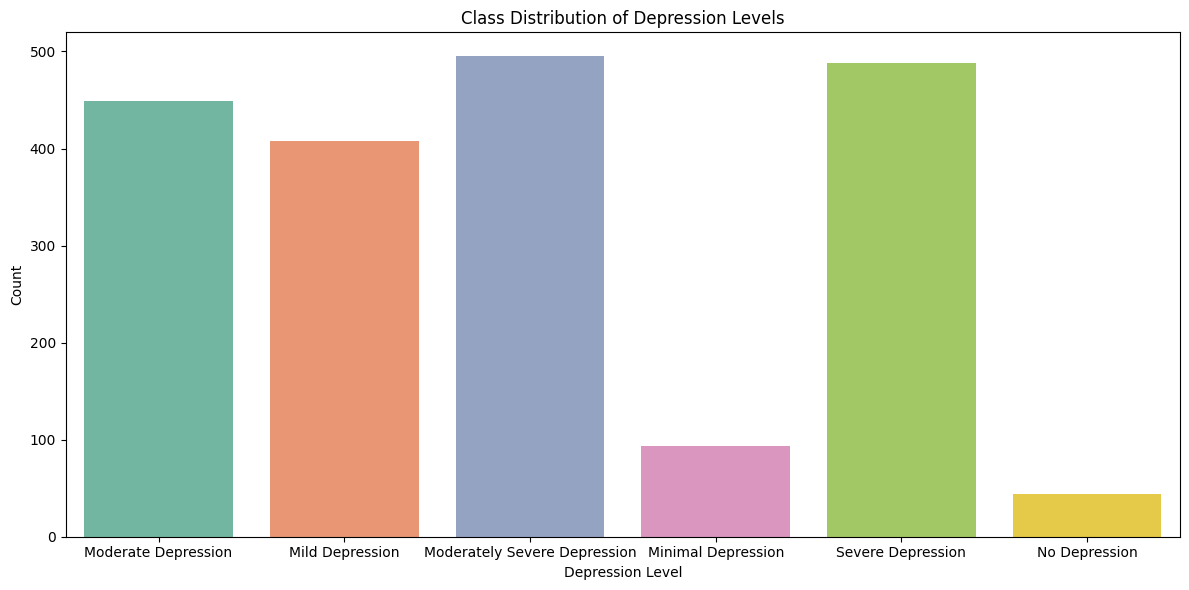

In [ ]:
# Check the distribution of the target variable (Depression Label)
target_col = 'Depression Label'
class_distribution = df[target_col].value_counts()

# Plot the class distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=target_col, data=df, palette='Set2')
plt.title("Class Distribution of Depression Levels")
plt.xlabel("Depression Level")
plt.ylabel("Count")
plt.tight_layout()

# Save the distribution plot as an image
plt.savefig("class_distribution.png")
plt.show()


#Histograms and Box Plot

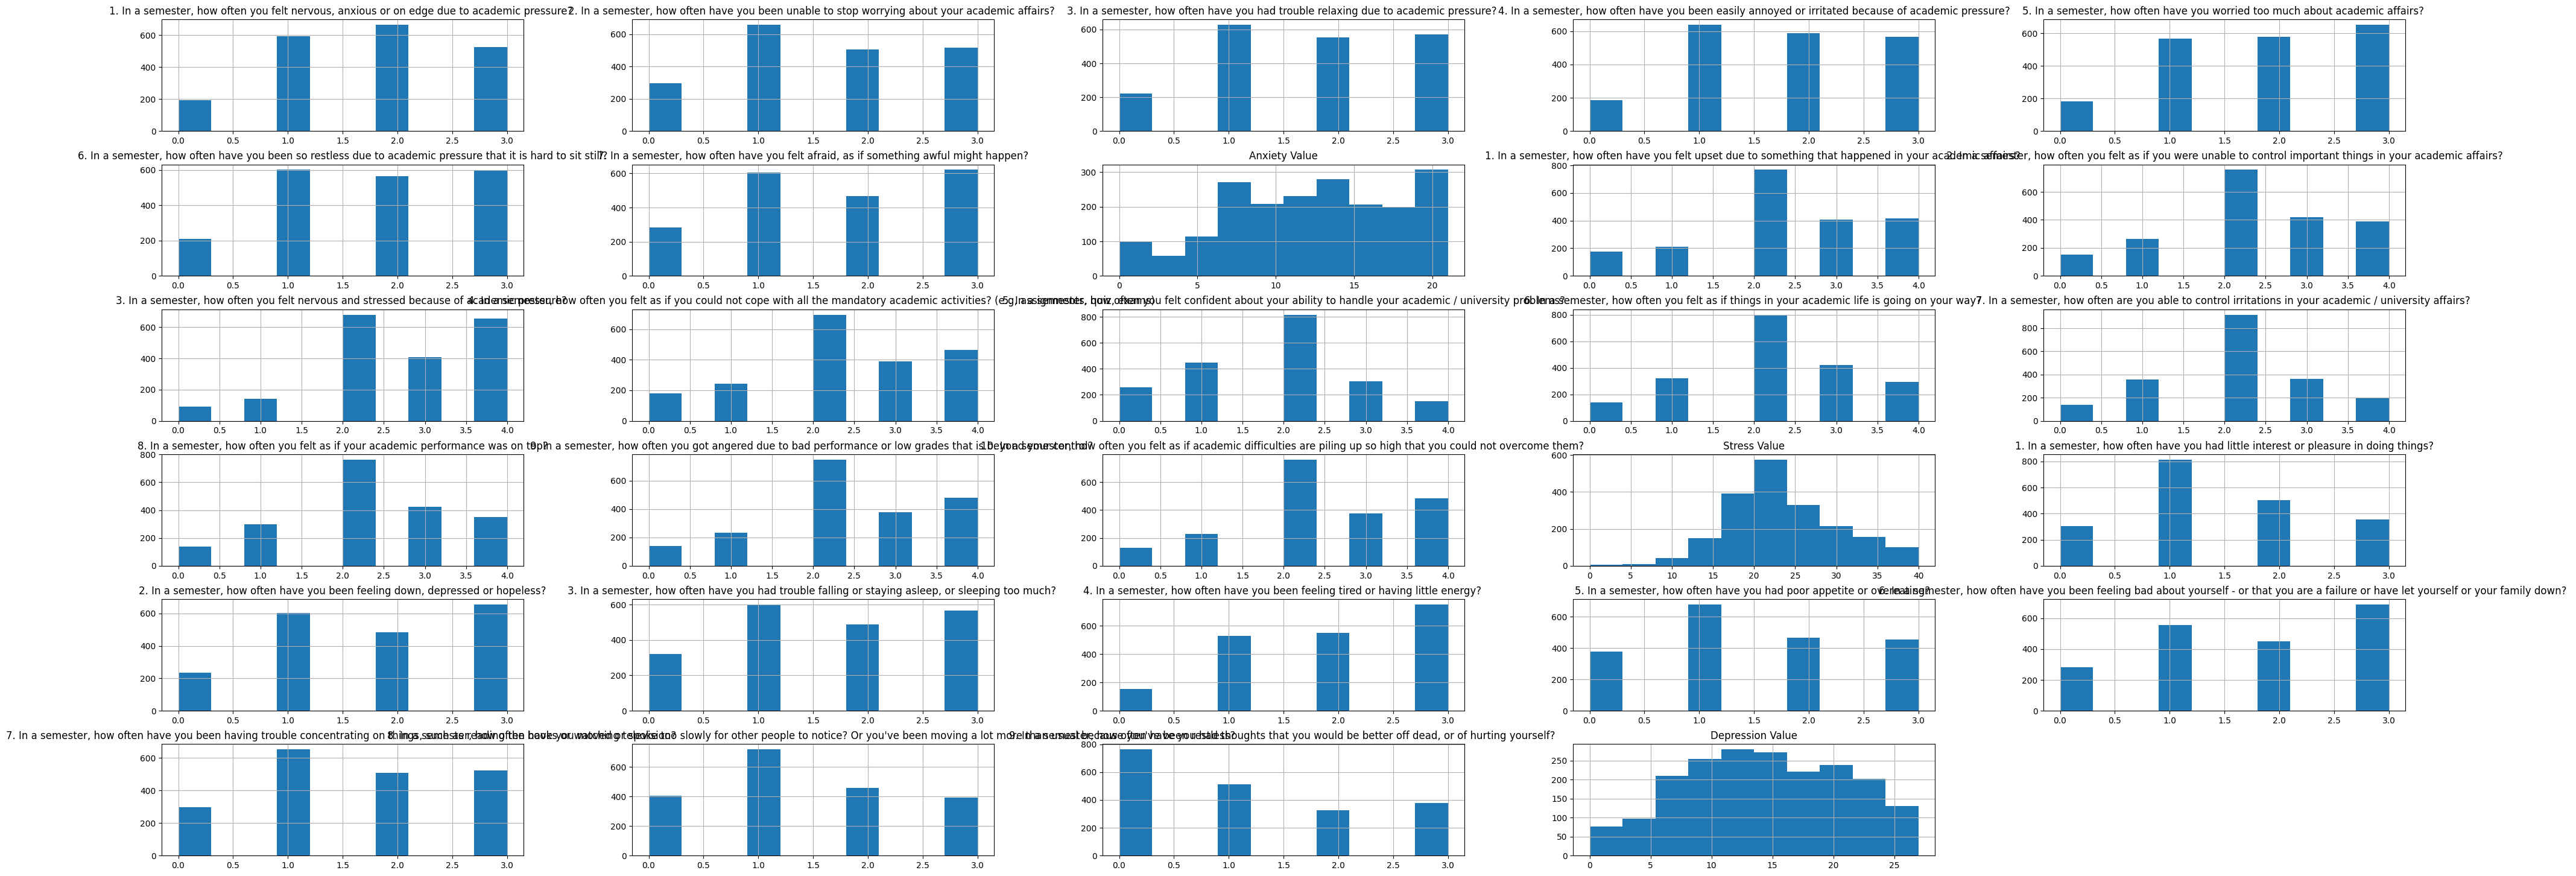

In [ ]:
numerical_data.hist(figsize=(48,18),bins=10)
plt.show()

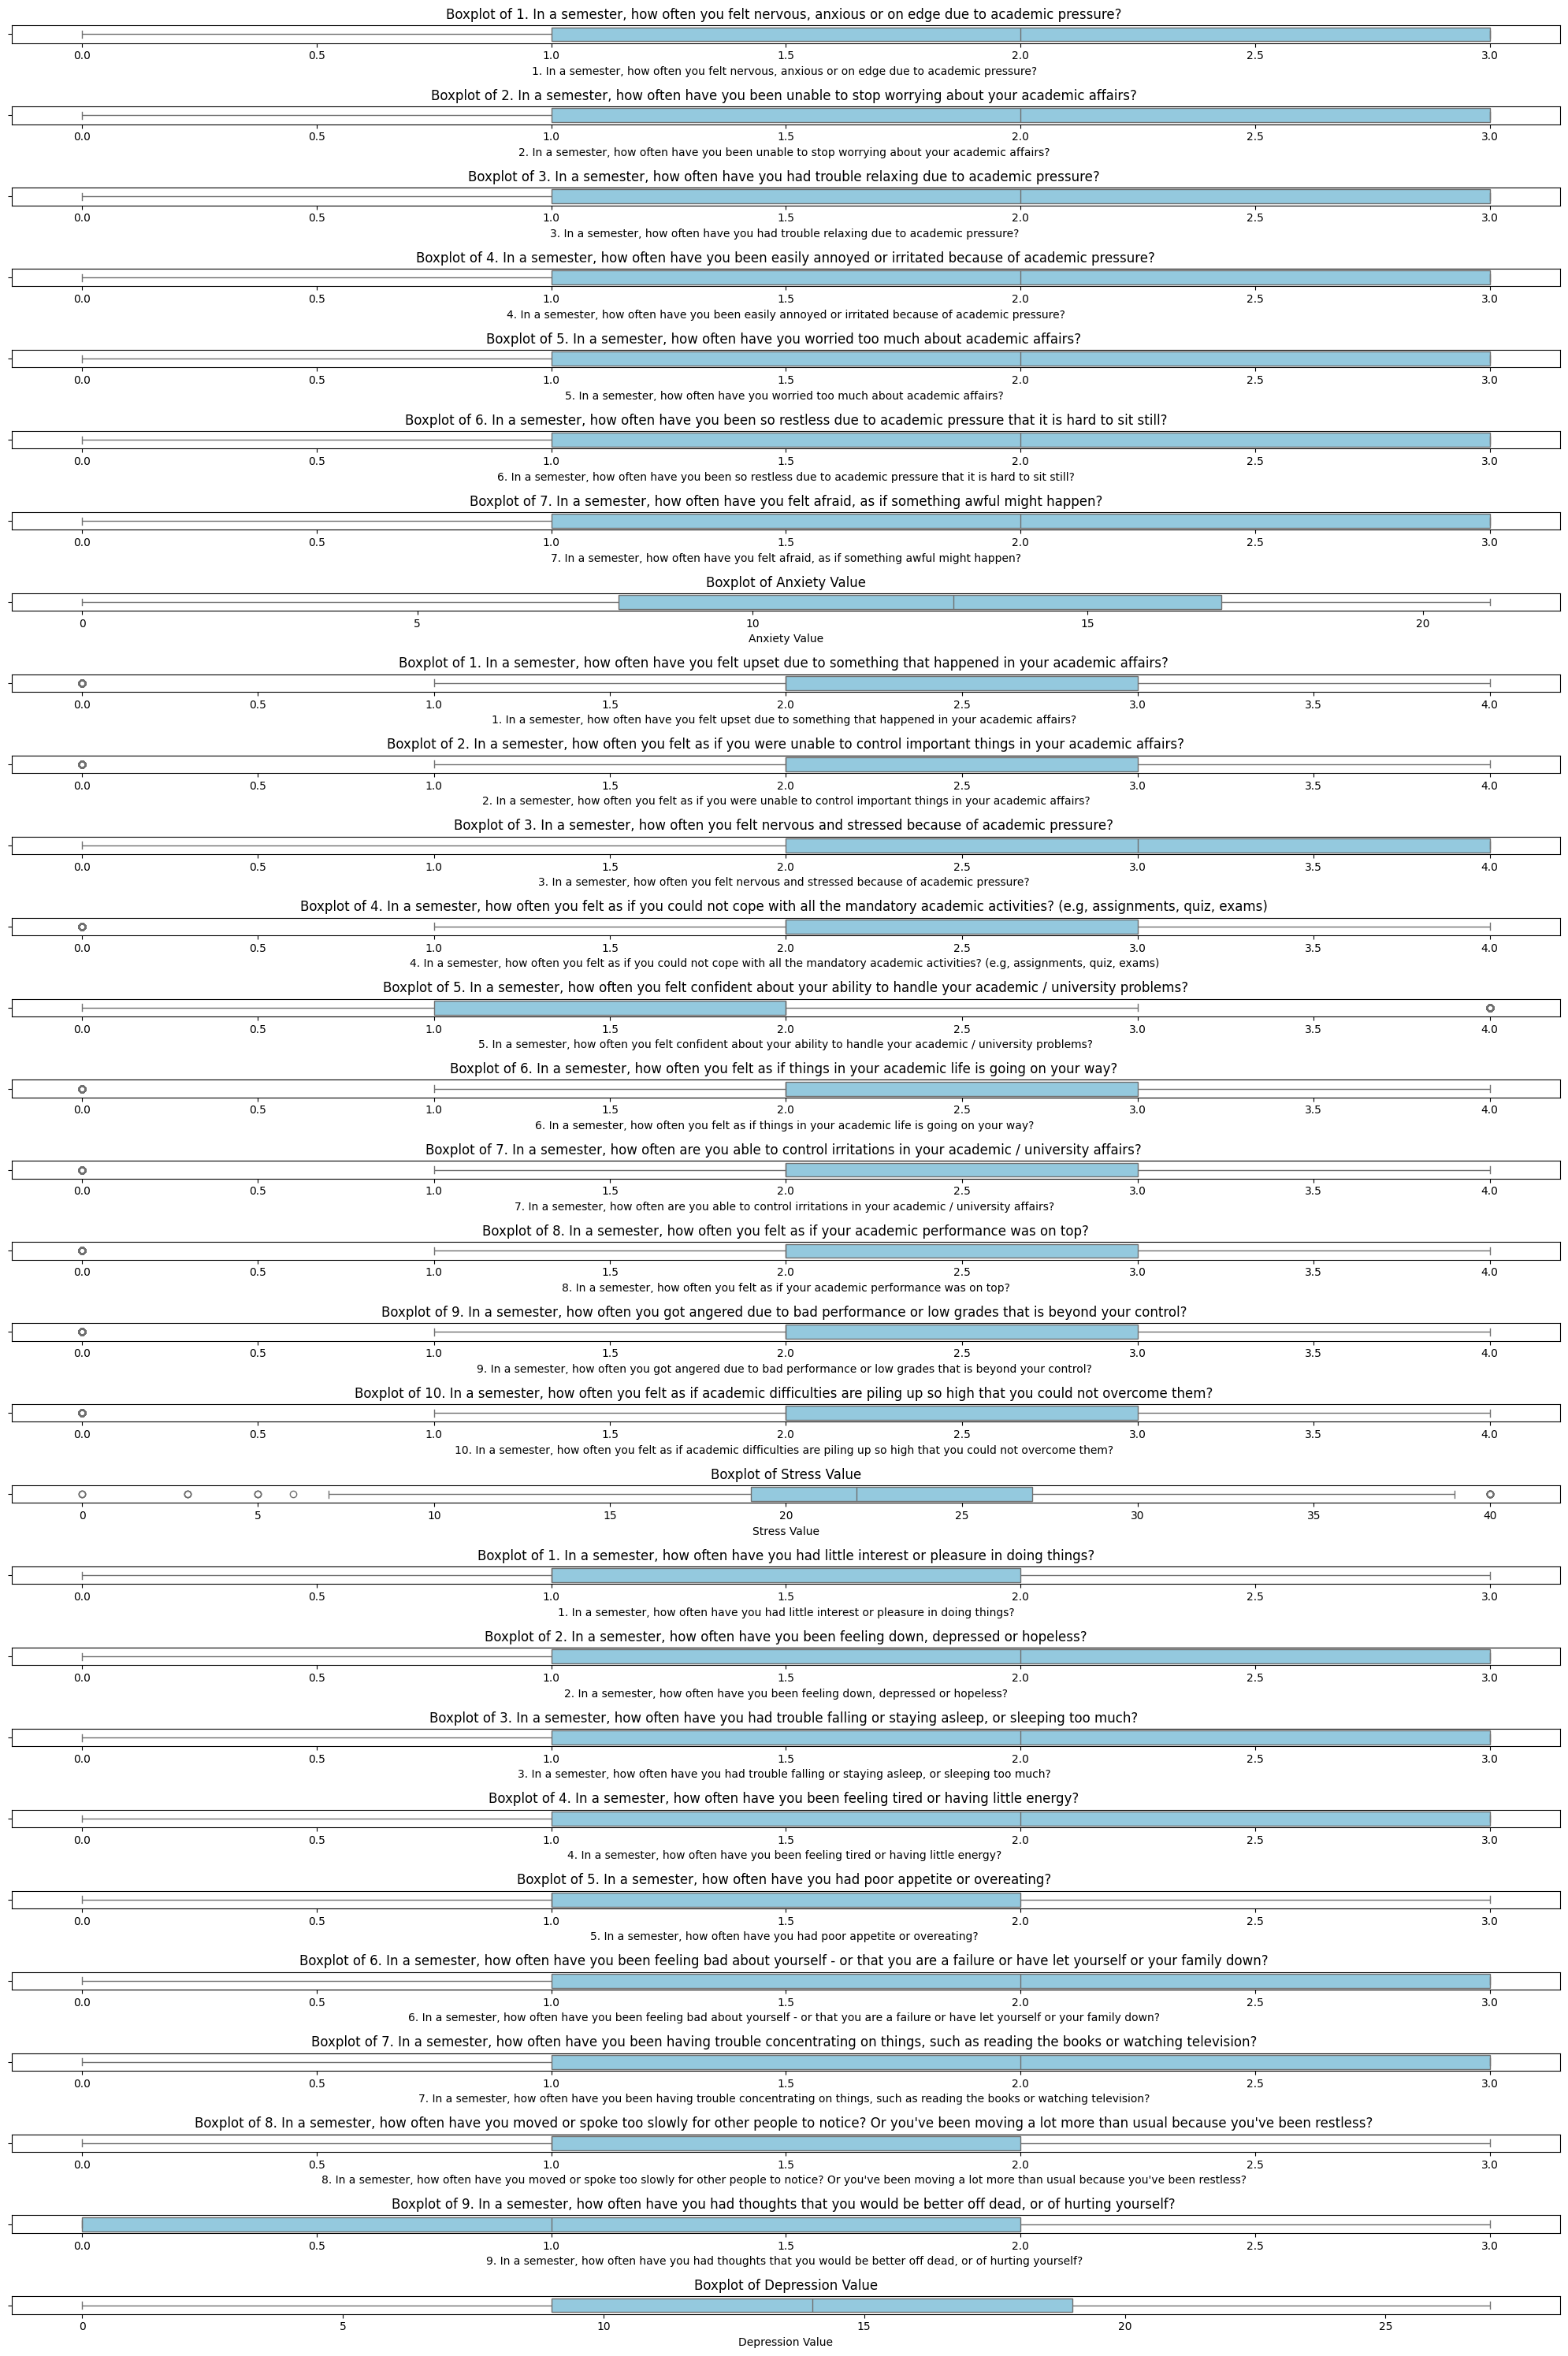

In [ ]:
# Select only numerical columns for boxplot analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(20, 30))

# Plot boxplots for each numerical feature including the target variable 'OUTCOME'
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

#Missing Values

In [ ]:
df.isnull().sum()

,0
1. Age,0
2. Gender,6
5. Academic Year,0
6. Current CGPA,0
7. Did you receive a waiver or scholarship at your university?,0
"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?",0
"2. In a semester, how often have you been unable to stop worrying about your academic affairs?",0
"3. In a semester, how often have you had trouble relaxing due to academic pressure?",0
"4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?",0
"5. In a semester, how often have you worried too much about academic affairs?",0


Categorical features

In [ ]:
# unique values counts
unique_counts=categorical_data.nunique()
print(unique_counts)

1. Age                                                            5
2. Gender                                                         3
5. Academic Year                                                  5
6. Current CGPA                                                   6
7. Did you receive a waiver or scholarship at your university?    2
Anxiety Label                                                     4
Stress Label                                                      3
Depression Label                                                  6
dtype: int64


#Data Pre Processing

In [ ]:
df_cleaned=df.copy()

df_cleaned=df_cleaned.dropna()  # Drop rows with any null values
label_encoders={}               #Encoding categorical values
categorical_cols=['1. Age', '2. Gender', '5. Academic Year', '6. Current CGPA', '7. Did you receive a waiver or scholarship at your university?', 'Depression Label']

for col in categorical_cols:
    le=LabelEncoder()
    df_cleaned[col]=le.fit_transform(df_cleaned[col])
    label_encoders[col]=le

#Seperating input and output
X=df_cleaned.drop(columns=['Depression Label', 'Anxiety Label', 'Stress Label']) #redundant columns
y=df_cleaned['Depression Label']

#Normalizing features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [ ]:
df_cleaned.isnull().sum()

,0
1. Age,0
2. Gender,0
5. Academic Year,0
6. Current CGPA,0
7. Did you receive a waiver or scholarship at your university?,0
"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?",0
"2. In a semester, how often have you been unable to stop worrying about your academic affairs?",0
"3. In a semester, how often have you had trouble relaxing due to academic pressure?",0
"4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?",0
"5. In a semester, how often have you worried too much about academic affairs?",0


#Dataset Splitting

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Output the shapes to confirm
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1379, 34), (592, 34), (1379,), (592,))

#Model training and testing

K Nearest Neighbour (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)


Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

In [ ]:
print(f"KNN Accuracy:         {accuracy_score(y_test, knn_preds)}")
print(f"Naive Bayes accuracy: {accuracy_score(y_test, nb_preds)}")

KNN Accuracy:         0.7043918918918919
Naive Bayes accuracy: 0.8327702702702703


Neural Network

In [ ]:
num_classes = len(set(y_train))
model = Sequential([Dense(64, activation='relu', input_shape=(X_train.shape[1],)),Dense(32, activation='relu'),Dense(num_classes, activation='softmax')])
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=100,batch_size=32)

# Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Neural network accuracy:")
test_accuracy


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3921 - loss: 1.4900 - val_accuracy: 0.5608 - val_loss: 1.1170
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6171 - loss: 1.0634 - val_accuracy: 0.6706 - val_loss: 0.9196
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7252 - loss: 0.8221 - val_accuracy: 0.7128 - val_loss: 0.7735
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7766 - loss: 0.6997 - val_accuracy: 0.7584 - val_loss: 0.6663
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8164 - loss: 0.5715 - val_accuracy: 0.8074 - val_loss: 0.5866
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8647 - loss: 0.4993 - val_accuracy: 0.8395 - val_loss: 0.5190
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8819 - loss: 0.4237 - val_accuracy: 0.8395 - val_loss: 0.4673
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9004 - loss: 0.3758 - val_accuracy: 0.8733 - v

0.9239864945411682

#Model selection/Comparison analysis

Bar Diagram

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


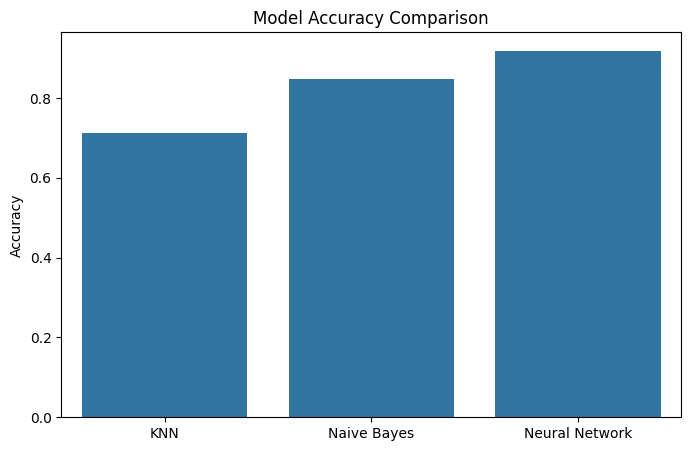

In [ ]:
knn_proba = knn.predict_proba(X_test)
nb_proba = nb.predict_proba(X_test)
nn_proba = model.predict(X_test)

# Get predictions for confusion matrix and precision/recall
knn_preds = knn.predict(X_test)
nb_preds = nb.predict(X_test)
nn_preds = np.argmax(model.predict(X_test), axis=1)

#Accuracy Bar chart
accuracies = [accuracy_score(y_test, knn_preds), accuracy_score(y_test, nb_preds), test_accuracy]
models = ["KNN", "Naive Bayes", "Neural Network"]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

F1, Recall and Precision

In [ ]:
models = {"KNN":knn_preds, "Naive Bayes":nb_preds, "Neural Network":nn_preds}
for model,prediction in models.items():
    print(f"{model}:")
    print(classification_report(y_test, prediction, zero_division=0))

KNN:
              precision    recall  f1-score   support

           0       0.57      0.92      0.70       122
           1       0.73      0.29      0.41        28
           2       0.72      0.40      0.51       135
           3       0.74      0.79      0.76       149
           4       0.64      0.69      0.67        13
           5       0.89      0.83      0.86       147

    accuracy                           0.71       594
   macro avg       0.71      0.65      0.65       594
weighted avg       0.73      0.71      0.70       594

Naive Bayes:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       122
           1       0.86      0.89      0.88        28
           2       0.84      0.83      0.83       135
           3       0.82      0.82      0.82       149
           4       1.00      1.00      1.00        13
           5       0.88      0.86      0.87       147

    accuracy                           0.85       594
   ma

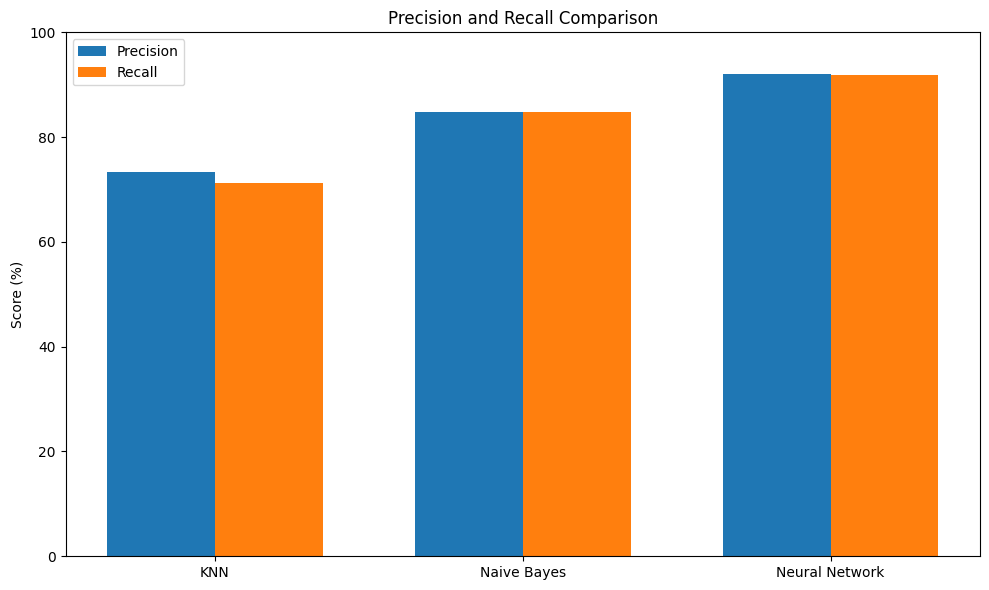

In [ ]:
# Model names
models = {"KNN": knn_preds, "Naive Bayes": nb_preds, "Neural Network": nn_preds}

#Precision and Recall
precisions = [precision_score(y_test, knn_preds, average='weighted', zero_division=0) * 100,precision_score(y_test, nb_preds, average='weighted', zero_division=0) * 100,precision_score(y_test, nn_preds, average='weighted', zero_division=0) * 100]

recalls = [recall_score(y_test, knn_preds, average='weighted', zero_division=0) * 100,recall_score(y_test, nb_preds, average='weighted', zero_division=0) * 100,recall_score(y_test, nn_preds, average='weighted', zero_division=0) * 100]

# Bar plot
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, precisions, width, label='Precision')
plt.bar(x + width / 2, recalls, width, label='Recall')
plt.xticks(x, models)
plt.ylabel("Score (%)")
plt.ylim(0, 100)
plt.title("Precision and Recall Comparison")
plt.legend()
plt.tight_layout()
plt.show()

AUC and ROC

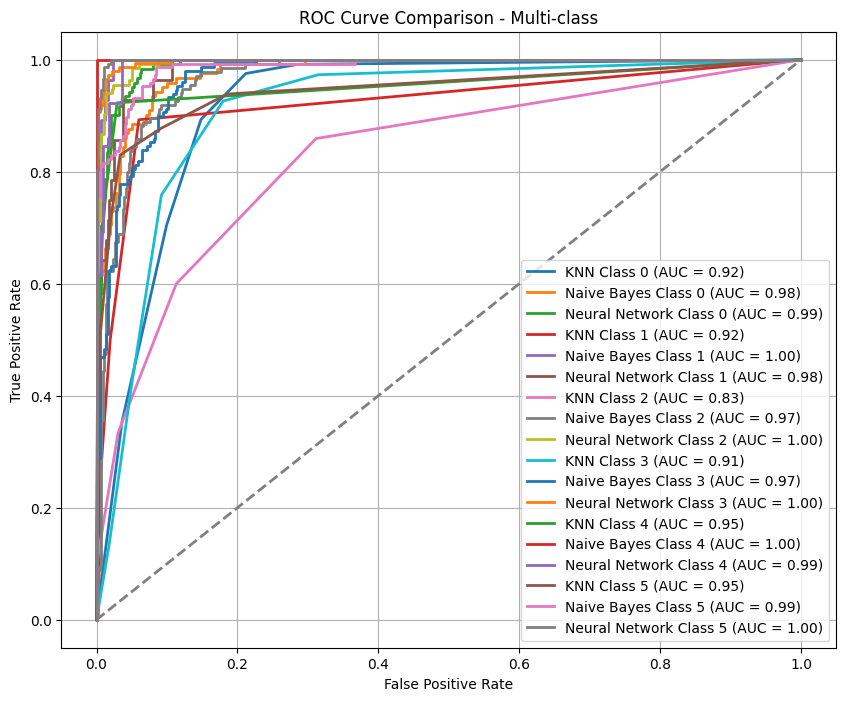

In [ ]:
# Binarize the labels for multi-class ROC curve (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])  # Adjust classes as needed

# For multi-class classification, get the probability for each class
fpr_knn, tpr_knn, roc_auc_knn = {}, {}, {}
fpr_nb, tpr_nb, roc_auc_nb = {}, {}, {}
fpr_nn, tpr_nn, roc_auc_nn = {}, {}, {}

for i in range(6):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], knn_proba[:, i])
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_bin[:, i], nb_proba[:, i])
    fpr_nn[i], tpr_nn[i], _ = roc_curve(y_test_bin[:, i], nn_proba[:, i])

    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])
    roc_auc_nn[i] = auc(fpr_nn[i], tpr_nn[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class (One-vs-Rest)
for i in range(6):  # Assuming there are 6 classes
    plt.plot(fpr_knn[i], tpr_knn[i], lw=2, label=f'KNN Class {i} (AUC = {roc_auc_knn[i]:.2f})')
    plt.plot(fpr_nb[i], tpr_nb[i], lw=2, label=f'Naive Bayes Class {i} (AUC = {roc_auc_nb[i]:.2f})')
    plt.plot(fpr_nn[i], tpr_nn[i], lw=2, label=f'Neural Network Class {i} (AUC = {roc_auc_nn[i]:.2f})')

# Random guess line (diagonal line)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Final plot setup
plt.title('ROC Curve Comparison - Multi-class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Confusion Matrix

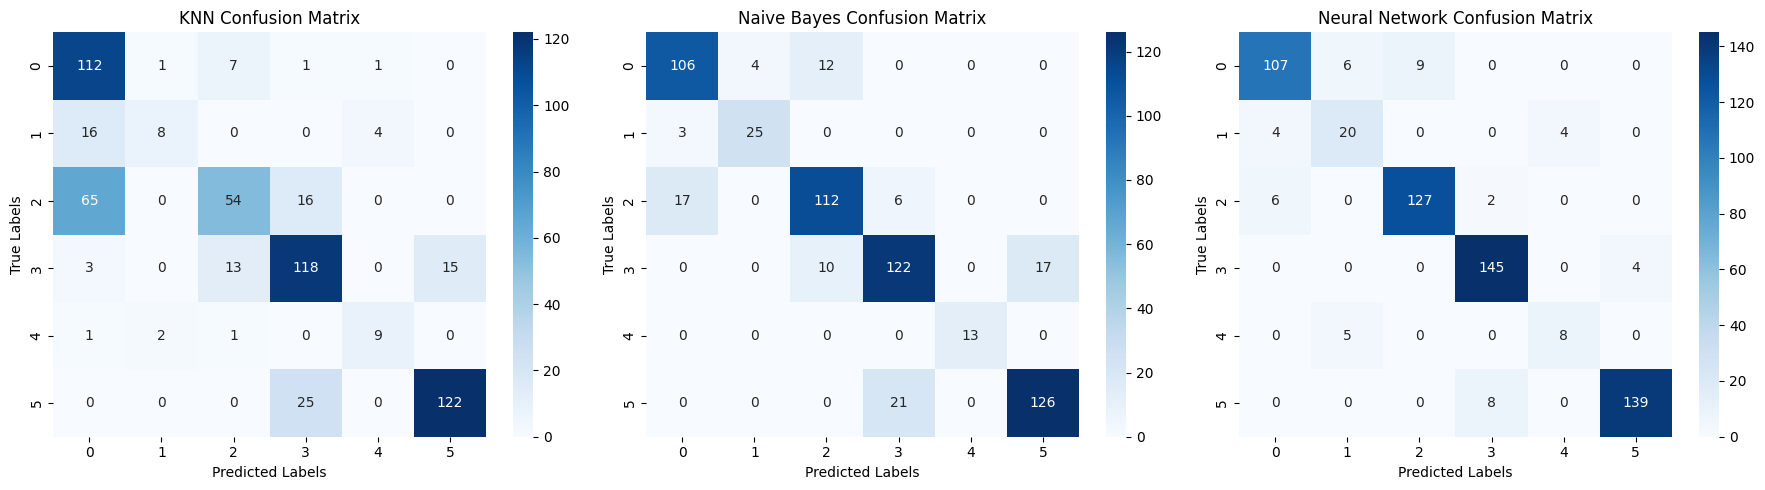

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("KNN Confusion Matrix")
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")

sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title("Naive Bayes Confusion Matrix")
ax[1].set_xlabel("Predicted Labels")
ax[1].set_ylabel("True Labels")

sns.heatmap(confusion_matrix(y_test, nn_preds), annot=True, fmt="d", cmap="Blues", ax=ax[2])
ax[2].set_title("Neural Network Confusion Matrix")
ax[2].set_xlabel("Predicted Labels")
ax[2].set_ylabel("True Labels")

plt.tight_layout()
plt.show()